In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [4]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [9]:
df['Alcohol Consumption'].unique()

array(['High', 'Medium', 'Low', nan], dtype=object)

In [10]:
# impute missing value in Alcohol Consumption
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna('unknown')


In [14]:
num_cols = ['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']
cat_cols = ['Gender' ,'Exercise Habits','Smoking' ,'Family Heart Disease' ,'Diabetes','High Blood Pressure','Low HDL Cholesterol' ,'High LDL Cholesterol','Stress Level','Sugar Consumption']

In [15]:
# impute missing values in other column which has 0.3% missing data with simple imputer

from sklearn.impute import SimpleImputer

#for numeric columns
num_imputer = SimpleImputer(strategy='median')

df[num_cols] = num_imputer.fit_transform(df[num_cols])

#for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [18]:
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [22]:
df['Heart Disease Status'] = df['Heart Disease Status'].map({
    'Yes': 1,
    'No': 0
})

In [23]:
corr_with_target = df.corr(numeric_only=True)['Heart Disease Status']
print(corr_with_target)

Age                    -0.009231
Blood Pressure         -0.013876
Cholesterol Level       0.002703
BMI                     0.019682
Sleep Hours            -0.003821
Triglyceride Level      0.002904
Fasting Blood Sugar    -0.002248
CRP Level              -0.006009
Homocysteine Level      0.008302
Heart Disease Status    1.000000
Name: Heart Disease Status, dtype: float64


In [24]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,0
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,0
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,0
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,0
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,0


In [27]:
# Encode binary categorical columns
binary_cols = [
    'Smoking',
    'Family Heart Disease',
    'Diabetes',
    'High Blood Pressure',
    'Low HDL Cholesterol',
    'High LDL Cholesterol'
]

for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

# Encode gender column
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [28]:
# ordinal Encoding
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'unknown' : -1
}

ordinal_cols = [
    'Exercise Habits',
    'Alcohol Consumption',
    'Stress Level',
    'Sugar Consumption'
]

for col in ordinal_cols:
    df[col] = df[col].map(ordinal_mapping)



In [29]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,2,1,1,0,24.991591,1,...,0,2,1,7.633228,1,342.0,120.0,12.969246,12.387250,0
1,69.0,0,146.0,286.0,2,0,1,1,25.221799,0,...,0,1,2,8.744034,1,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,0,0,0,0,29.855447,0,...,1,0,0,4.440440,0,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,2,1,1,0,24.130477,1,...,1,0,2,5.249405,2,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,0,1,1,1,20.486289,1,...,0,0,2,7.030971,2,263.0,154.0,10.381259,8.153887,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  int64  
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  int64  
 5   Smoking               10000 non-null  int64  
 6   Family Heart Disease  10000 non-null  int64  
 7   Diabetes              10000 non-null  int64  
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  int64  
 10  Low HDL Cholesterol   10000 non-null  int64  
 11  High LDL Cholesterol  10000 non-null  int64  
 12  Alcohol Consumption   10000 non-null  int64  
 13  Stress Level          10000 non-null  int64  
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

In [31]:
corr_with_target = df.corr(numeric_only=True)['Heart Disease Status']
print(corr_with_target)

Age                    -0.009231
Gender                 -0.017200
Blood Pressure         -0.013876
Cholesterol Level       0.002703
Exercise Habits         0.001776
Smoking                 0.002701
Family Heart Disease   -0.007500
Diabetes               -0.002700
BMI                     0.019682
High Blood Pressure     0.002200
Low HDL Cholesterol    -0.006000
High LDL Cholesterol    0.008201
Alcohol Consumption     0.012021
Stress Level            0.011332
Sleep Hours            -0.003821
Sugar Consumption       0.007303
Triglyceride Level      0.002904
Fasting Blood Sugar    -0.002248
CRP Level              -0.006009
Homocysteine Level      0.008302
Heart Disease Status    1.000000
Name: Heart Disease Status, dtype: float64


Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64


<Axes: xlabel='Heart Disease Status', ylabel='count'>

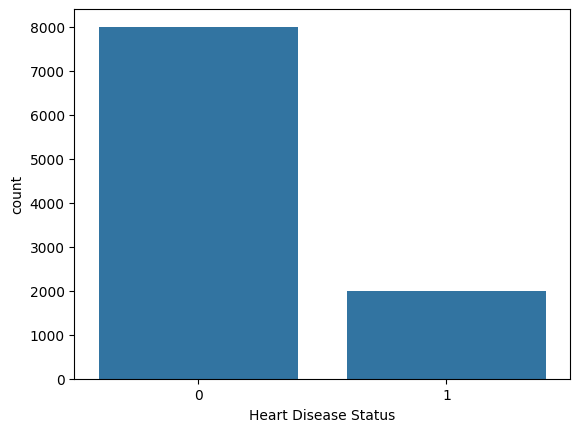

In [32]:
print(df['Heart Disease Status'].value_counts())
sns.barplot(df['Heart Disease Status'].value_counts())

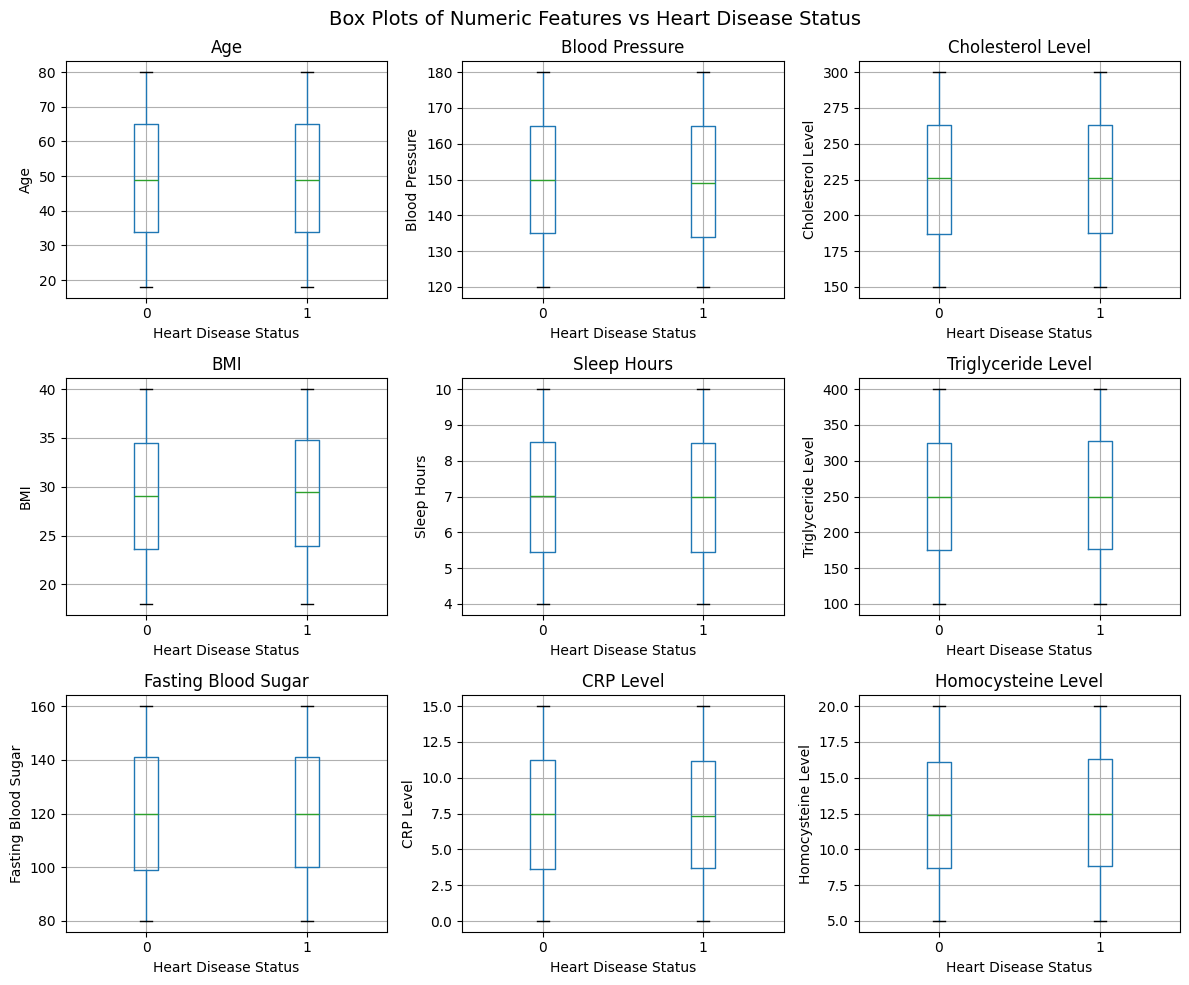

In [42]:
num_cols = ['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours','Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    df.boxplot(column=col, by='Heart Disease Status', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Heart Disease Status')
    axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box Plots of Numeric Features vs Heart Disease Status', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# outliers detection using median absolute deviation 
num_columns = df.select_dtypes(include='number').columns.drop('Heart Disease Status')

outlier_dict = {}

for col in num_columns:
    median = df[col].median()
    mad = (df[col] - median).abs().median()

    if mad == 0:
        outlier_dict[col] = []
        continue

    outliers = df.index[(df[col] - median).abs() > 3 * mad]
    outlier_dict[col] = outliers


for col, idx in outlier_dict.items():
    print(f"{col}: {len(idx)} outliers")



Age: 0 outliers
Gender: 0 outliers
Blood Pressure: 0 outliers
Cholesterol Level: 0 outliers
Exercise Habits: 0 outliers
Smoking: 0 outliers
Family Heart Disease: 0 outliers
Diabetes: 0 outliers
BMI: 0 outliers
High Blood Pressure: 0 outliers
Low HDL Cholesterol: 0 outliers
High LDL Cholesterol: 0 outliers
Alcohol Consumption: 0 outliers
Stress Level: 0 outliers
Sleep Hours: 0 outliers
Sugar Consumption: 0 outliers
Triglyceride Level: 0 outliers
Fasting Blood Sugar: 0 outliers
CRP Level: 0 outliers
Homocysteine Level: 0 outliers


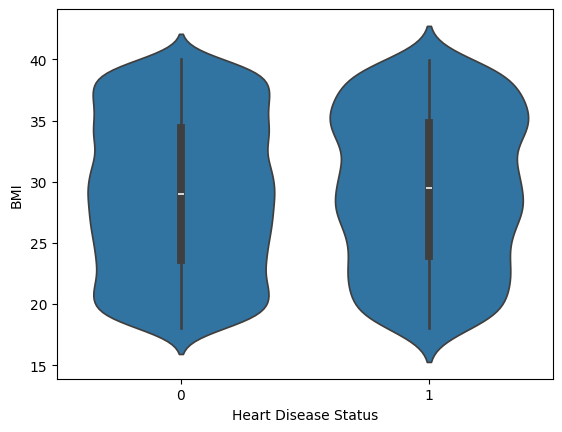

In [52]:
sns.violinplot(x='Heart Disease Status', y='BMI', data=df)
plt.show()


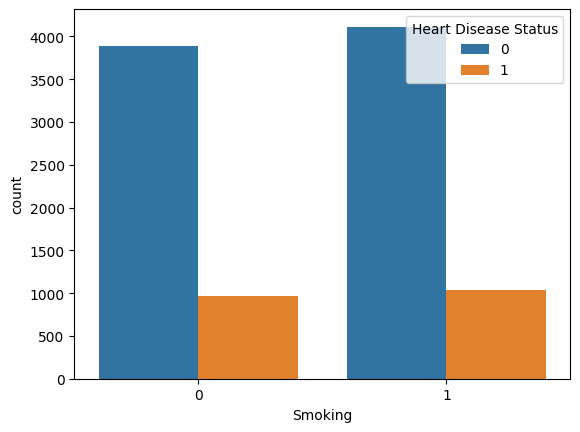

In [53]:
sns.countplot(x='Smoking', hue='Heart Disease Status', data=df)
plt.show()


In [57]:
df.head(3)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,2,1,1,0,24.991591,1,...,0,2,1,7.633228,1,342.0,120.0,12.969246,12.387250,0
1,69.0,0,146.0,286.0,2,0,1,1,25.221799,0,...,0,1,2,8.744034,1,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,0,0,0,0,29.855447,0,...,1,0,0,4.440440,0,393.0,92.0,12.709873,11.230926,0


In [58]:
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))

Accuracy: 0.507
Confusion Matrix:
 [[847 753]
 [233 167]]
              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1600
           1       0.18      0.42      0.25       400

    accuracy                           0.51      2000
   macro avg       0.48      0.47      0.44      2000
weighted avg       0.66      0.51      0.56      2000



In [79]:
y_proba = pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.46918281250000005


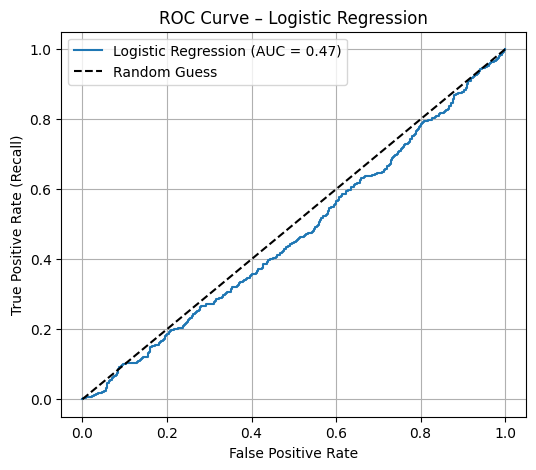

In [80]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Logistic Regression')
plt.legend()
plt.grid()
plt.show()

In [81]:
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]

print("Best Threshold (Youden’s J):", best_threshold)
print("Recall at best threshold:", tpr[best_idx])
print("FPR at best threshold:", fpr[best_idx])

Best Threshold (Youden’s J): 0.5456717725122687
Recall at best threshold: 0.0925
FPR at best threshold: 0.0875


In [62]:
# SVM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(
        kernel='rbf',
        class_weight='balanced',
        probability=True,
        random_state=42
    ))
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("SVM Results")
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Results
Accuracy: 0.559
[[952 648]
 [234 166]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1600
           1       0.20      0.41      0.27       400

    accuracy                           0.56      2000
   macro avg       0.50      0.51      0.48      2000
weighted avg       0.68      0.56      0.60      2000



In [ ]:
#use best features only 
from sklearn.feature_selection import RFE

rfe = RFE(
    estimator=LogisticRegression(
        class_weight='balanced',
        solver='liblinear',
        max_iter=1000
    ),
    n_features_to_select=10
)

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print(selected_features)


Index(['Gender', 'Smoking', 'Family Heart Disease', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Stress Level', 'Sleep Hours', 'Sugar Consumption'],
      dtype='object')


In [85]:
X_selected = X[selected_features]
from sklearn.model_selection import train_test_split

X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    X_selected,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_sel = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    ))
])



In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear']
}

grid_sel = GridSearchCV(
    pipeline_sel,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

grid_sel.fit(X_train_sel, y_train)

best_model_sel = grid_sel.best_estimator_

print("Best Params (Selected Features):", grid_sel.best_params_)

y_pred_sel = best_model_sel.predict(X_test_sel)

print("=== Default Threshold (0.5) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sel))
print("Classification Report:\n", classification_report(y_test, y_pred_sel))

Best Params (Selected Features): {'model__C': 0.01, 'model__solver': 'liblinear'}
=== Default Threshold (0.5) ===
Accuracy: 0.5155
Confusion Matrix:
 [[857 743]
 [226 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.54      0.64      1600
           1       0.19      0.43      0.26       400

    accuracy                           0.52      2000
   macro avg       0.49      0.49      0.45      2000
weighted avg       0.67      0.52      0.56      2000

